In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from datetime import datetime
import csv

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.naive_bayes import ComplementNB

In [3]:
FOLDER_PATH = "D:\\Google Drive\\Catherning Folder\\THU\\Thesis\\Recipe datasets\\"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["random","cluster_centroid","full"]
dataset = DATASET[1]
file = FILES[2]

In [4]:
df_train=pd.read_pickle(os.path.join(FOLDER_PATH,dataset,file+"_data.pkl"))
df_train=df_train.reset_index()
df_train

,index,id,cuisine,ingredients,all_ingredients
0,0,0,Italian,"[baby_bella_mushroom_sliced, arborio_rice, oli...",baby_bella_mushroom_sliced;arborio_rice;olive_...
1,2,2,Italian,"[garlic, extra-virgin_olive_oil_divided, madei...",garlic;extra-virgin_olive_oil_divided;madeira_...
2,3,3,French,"[garlic_halved, cooking_spray, peeled_red_pota...",garlic_halved;cooking_spray;peeled_red_potato_...
3,5,5,American,"[turkey_thawed, maple_syrup, bourbon, pickling...",turkey_thawed;maple_syrup;bourbon;pickling_spi...
4,6,6,American,"[beef_tenderloin__silver_skin_trimmed, worcest...",beef_tenderloin__silver_skin_trimmed;worcester...
...,...,...,...,...,...
26321,27633,27633,Italian,"[zwiebeln, knoblauchzehen, dose__dicke_weisse_...",zwiebeln;knoblauchzehen;dose__dicke_weisse_boh...
26322,27634,27634,American,"[fresh_lavender_blossom_, sugar, carrot_juice,...",fresh_lavender_blossom_;sugar;carrot_juice;pot...
26323,27635,27635,French,"[gr._bread_flour, ml._water, gr._yeast, gr._st...",gr._bread_flour;ml._water;gr._yeast;gr._strong...
26324,27636,27636,American,"[flour, unsweetened_cocoa_powder, baking_soda,...",flour;unsweetened_cocoa_powder;baking_soda;sal...


In [5]:
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)

## Processing

In [6]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
print(enc.classes_)
enc.classes_.shape

['American' 'Asian' 'Cuban' 'English_Irish' 'French' 'Indian' 'Italian'
 'Mediterranean' 'Mexican' 'Moroccan' 'Spanish_Portuguese']


(11,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 2380,
 1: 515,
 2: 6,
 3: 3,
 4: 313,
 5: 292,
 6: 914,
 7: 30,
 8: 799,
 9: 2,
 10: 12}

# Logistic Regression

In [8]:
parameters = {'C':[0.4,0.5,0.6,0.7],
              'solver' : ('newton-cg', 'liblinear')}
# sorted(sklearn.metrics.SCORERS.keys())
scoring = 'f1_weighted'
logistic = LogisticRegression(class_weight="balanced",multi_class="auto",max_iter=150,warm_start=True)

clf = GridSearchCV(logistic, parameters, cv=4,scoring=scoring)
clf.fit(X_train, y_train)

D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pre

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=150, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.4, 0.5, 0.6, 0.7],
                         'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

## Results

In [9]:
# pd.DataFrame(clf.cv_results_)
print(clf.best_estimator_)
clf.best_score_
# LogisticRegression(C=0.6, class_weight='balanced', dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=150, multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=True)

# LogisticRegression(C=0.4, class_weight='balanced', dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=150, multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=True)

LogisticRegression(C=0.7, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=150, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=True)


0.8286582369072923

In [10]:
test_score = clf.best_estimator_.score(X_test, y_test)

In [11]:
# For future predictions, get proba and only classifies if proba is higher than threshold
def threshold_classification(clf,X_test,y_test,threshold=0.85):
    y_pred_prob = clf.best_estimator_.predict_proba(X_test)
    max_prob = y_pred_prob.max(axis=1)
    y_pred = y_pred_prob.argmax(axis=1)

    to_del = np.argwhere(max_prob < threshold).T[0]

    partial_y_pred = np.delete(y_pred,to_del)
    partial_y_test = np.delete(y_test,to_del)

    print(len(to_del),len(y_pred))
    proba_score = accuracy_score(partial_y_test,partial_y_pred) #0.9373983739837398
    
    return proba_score

threshold = 0.85
proba_score = threshold_classification(clf,X_test,y_test,threshold=threshold)

2815 5266


In [12]:
def confusion_matrix_plot(y_pred,y_labels,save_path):
    fig = plt.figure(figsize=(10, 10))

    cm = confusion_matrix(y_labels, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm_normalized, interpolation='nearest')
    plt.title("confusion matrix")
    plt.colorbar(shrink=0.3)
    cuisines = df_train['cuisine'].value_counts().index
    tick_marks = np.arange(len(cuisines))
    plt.xticks(tick_marks, enc.classes_, rotation=90)
    plt.yticks(tick_marks, enc.classes_)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.show()
    
    fig.savefig(save_path, dpi=fig.dpi)

In [15]:
date = datetime.now().strftime("%m-%d-%H-%M")
RESULTS_FOLDER = os.path.join(FOLDER_PATH,dataset,f"results_ML_{date}_{file}")
if not os.path.exists(RESULTS_FOLDER):
    os.makedirs(RESULTS_FOLDER)

D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


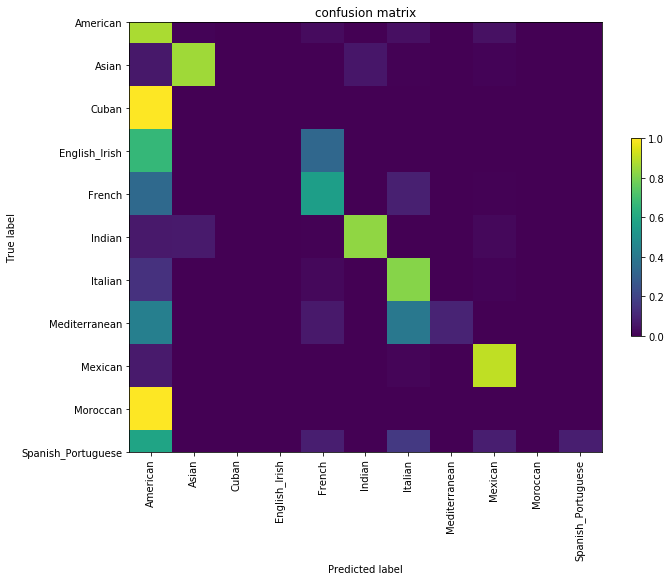

In [16]:
y_pred = clf.best_estimator_.predict(X_test)
confusion_matrix_plot(y_pred, y_test,os.path.join(RESULTS_FOLDER,'logistic_regression.png'))

In [20]:
def classification_report_to_csv(y_test,y_pred,enc,model_type,RESULTS_FOLDER):
    report = classification_report(y_test, y_pred, labels=[i for i in range(enc.classes_.shape[0])], target_names=enc.classes_, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.to_csv(os.path.join(RESULTS_FOLDER,f'{model_type}.csv'))
    
classification_report_to_csv(y_test,y_pred,enc,"logistic_regression",RESULTS_FOLDER)    

## Saving results

In [21]:
results_file = os.path.join(RESULTS_FOLDER,"results.csv")
with open(results_file,"w", newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(["model","best parameters","best f1 train score","test score","threshold","proba score"])
    writer.writerow(["logistic regression",clf.best_estimator_,clf.best_score_,test_score,threshold,proba_score])

# Random Forest

much slower and a bit worse

In [22]:
parameters = {'max_depth':(None,3,5,8)}
# sorted(sklearn.metrics.SCORERS.keys())
scoring = 'f1_weighted'
rf = RandomForestClassifier(n_estimators=200, random_state=123,class_weight="balanced")

clf = GridSearchCV(rf, parameters, cv=4,scoring=scoring)
clf.fit(X_train, y_train)

D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pre

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=False),
             i

In [23]:
print(clf.best_estimator_)
clf.best_score_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


0.7258390868300134

In [24]:
clf.best_estimator_.score(X_test, y_test)

0.7593999240410179

In [25]:
proba_score = threshold_classification(clf,X_test,y_test,threshold=threshold)

4016 5266


## Results

D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


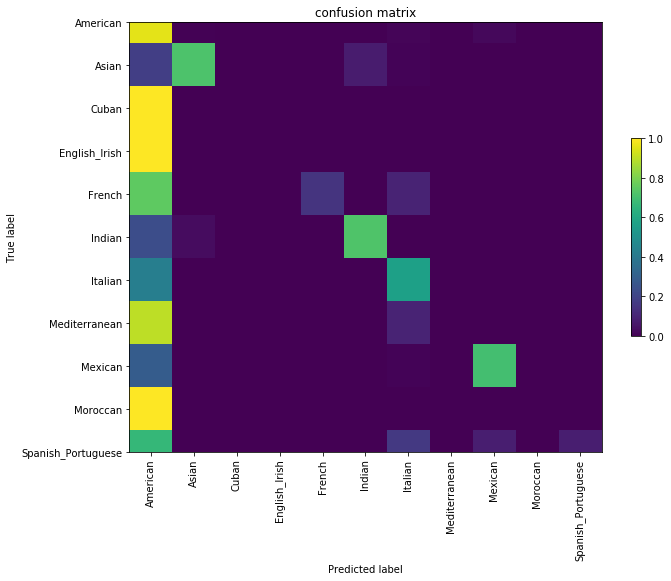

In [26]:
y_pred = clf.predict(X_test)
confusion_matrix_plot(y_pred, y_test,os.path.join(RESULTS_FOLDER,'random_forest.png'))

In [27]:
classification_report_to_csv(y_test,y_pred,enc,"logistic_regression",RESULTS_FOLDER)

D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
with open(results_file,"a", newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(["random forest",clf.best_estimator_,clf.best_score_,test_score,threshold,proba_score])

# SVM

In [29]:
parameters = {'loss':('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron')
              }
# sorted(sklearn.metrics.SCORERS.keys())
scoring = 'f1_weighted'
sgd = SGDClassifier(class_weight="balanced",early_stopping=True,warm_start=True)

clf = GridSearchCV(sgd, parameters, cv=4,scoring=scoring)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=True, epsilon=0.1, eta0=0.0,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='optimal', loss='hinge',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=True),
             iid='warn', n_jobs=None,
             param_grid={'loss': ('hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron')},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [30]:
print(clf.best_estimator_)
clf.best_score_

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=True)


0.8258234661096393

In [31]:
clf.best_estimator_.score(X_test, y_test)

0.8304215723509305

In [32]:
proba_score = threshold_classification(clf,X_test,y_test,threshold=threshold)

2850 5266


D:\Applications\Anaconda3\envs\pandas_analysis\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


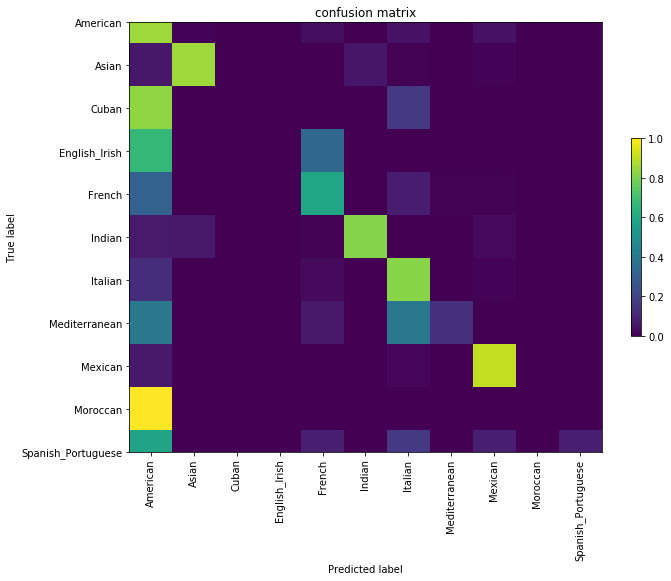

In [33]:
y_pred = clf.predict(X_test)
confusion_matrix_plot(y_pred, y_test,os.path.join(RESULTS_FOLDER,'svm.png'))

In [34]:
classification_report_to_csv(y_test,y_pred,enc,"logistic_regression",RESULTS_FOLDER)    

In [35]:
with open(results_file,"a", newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(["svm",clf.best_estimator_,clf.best_score_,test_score,threshold,proba_score])

# Naive Bayes

In [36]:
clf = ComplementNB()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8260539308773263

In [37]:
proba_score = threshold_classification(clf,X_test,y_test,threshold=threshold)

AttributeError: 'ComplementNB' object has no attribute 'best_estimator_'

In [ ]:
y_pred = clf.predict(X_test)
confusion_matrix_plot(y_pred, y_test,os.path.join(RESULTS_FOLDER,'naive_bayes.png'))

In [ ]:
classification_report_to_csv(y_test,y_pred,enc,"logistic_regression",RESULTS_FOLDER)    

In [ ]:
with open(results_file,"a", newline='') as f:
    writer = csv.writer(f, delimiter=';')
    writer.writerow(["naive bayes",clf.best_estimator_,clf.best_score_,test_score,threshold,proba_score])